In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in processed data
df = pd.read_csv(r'C:\Users\Ricky\Desktop\data-science-summer-2025\Faircare_Project\data_processed.csv')
df.head()

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,d_genitourinary_ind,d_pegnancy_ind,d_skin_ind,d_musculo_ind,d_congenital_ind,d_perinatal_ind,d_symptoms_ind,d_injury_ind,dia_med_change_ind,dia_med_nochange_ind
0,0,6,25,1,1,41,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,1,7,3,59,0,18,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,1,1,7,2,11,5,13,2,0,...,0,1,0,0,0,0,0,0,0,1
3,3,1,1,7,2,44,1,16,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,1,1,7,1,51,0,8,0,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
# Check the target column
print(df['readmitted'])
print('readmitted is column number ', df.columns.get_loc('readmitted'))

0         NO
1        >30
2         NO
3         NO
4         NO
        ... 
97103    >30
97104     NO
97105     NO
97106     NO
97107     NO
Name: readmitted, Length: 97108, dtype: object
readmitted is column number  22


Our initial goal was to predict for 30 day hospital readmissions, so we combine the values 'NO' and '>30' in the column 'readmitted' and relabel the value with the integer 0.
This is because there is no readmission for the patient in less than 30 days.

The value '<30' has been relabeled with the integer 1.

In [4]:
df.loc[df['readmitted'] == 'NO', 'readmitted'] = int(0)
df.loc[df['readmitted'] == '>30', 'readmitted'] = int(0)
df.loc[df['readmitted'] == '<30', 'readmitted'] = int(1)

# Make sure column values are integers, necessary for classification algorithms later
df['readmitted'] = df['readmitted'].astype('int')
print(df['readmitted'].dtype)

int64


In [5]:
# List all columns in dataset
df.columns 

Index(['age', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'diabetesMed',
       'readmitted', 'caucasian_ind', 'africanamerican_ind', 'hispanic_ind',
       'asian_ind', 'otherrace_ind', 'female_ind', 'male_ind',
       'd_external_index', 'd_supplementary_index', 'd_infect_ind',
       'd_neoplasm_ind', 'd_endocrine_ind', 'd_blood_ind', 'd_mental_ind',
       'd_nervous_ind', 'd_circulatory_ind', 'd_respiratory_ind',
       'd_digestive_ind', 'd_genitourinary_ind', 'd_pegnancy_ind',
       'd_skin_ind', 'd_musculo_ind', 'd_congenital_ind', 'd_perinatal_ind',
       'd_symptoms_ind', 'd_injury_ind', 'dia_med_change_ind',
       'dia_med_noch

In [6]:
# Single out which columns will be usede to predict readmit rate
features = ['age', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'diabetesMed', 
       'caucasian_ind', 'africanamerican_ind', 'hispanic_ind',
       'asian_ind', 'otherrace_ind', 'female_ind', 'male_ind',
       'd_external_index', 'd_supplementary_index', 'd_infect_ind',
       'd_neoplasm_ind', 'd_endocrine_ind', 'd_blood_ind', 'd_mental_ind',
       'd_nervous_ind', 'd_circulatory_ind', 'd_respiratory_ind',
       'd_digestive_ind', 'd_genitourinary_ind', 'd_pegnancy_ind',
       'd_skin_ind', 'd_musculo_ind', 'd_congenital_ind', 'd_perinatal_ind',
       'd_symptoms_ind', 'd_injury_ind', 'dia_med_change_ind',
       'dia_med_nochange_ind']


In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=.2, random_state=42)

We first use knn classification. On the training data, we perform a 5-fold split, and compute the accuracy and confusion matrices for the model at each split.

For knn, we begin with the hyperparameter 15.

In [8]:
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

n_splits = 5
current_split = 0
metrics={n:[] for n in range(0,n_splits)}

pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier(15))])

kfold = KFold(n_splits, shuffle = True)

for s_train, s_test in kfold.split(train):

    train_features = train.iloc[s_train][features]
    test_features = train.iloc[s_test][features]

    train_target = train.iloc[s_train]['readmitted']
    test_target = train.iloc[s_test]['readmitted']

    pipe.fit(train_features,train_target)
    metrics[current_split].append(accuracy_score(pipe.predict(test_features), test_target))
    metrics[current_split].append(confusion_matrix(pipe.predict(test_features), test_target))

    current_split += 1

for k in range(0,4):
    print('The accuracy of split ', k, ' is ', metrics[k][0], ' confusion is ', metrics[k][1])


The accuracy of split  0  is  0.8852490668039644  confusion is  [[13732  1769]
 [   14    23]]
The accuracy of split  1  is  0.8871725558344596  confusion is  [[13768  1741]
 [   12    16]]
The accuracy of split  2  is  0.8844049687841926  confusion is  [[13723  1774]
 [   22    18]]
The accuracy of split  3  is  0.8836969813992406  confusion is  [[13712  1787]
 [   20    18]]


Now we cross-validate to see if we can choose a better hyperparameter for imporving accuracy. For the kfold, we still do 5 splits.

From the results, it seems unlikey accuracy can be imporved beyond about 88% just by varying the hyperparametter.

In [9]:
n_splits = 5
kfold = KFold(n_splits, shuffle = True)

ave_accuracies = {k:[] for k in range(1,21)}

for k in range(1,21):

    pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier(15))])
    accuracy = [] #Holds accuracy of model at each split, to be averaged later

    for s_train, s_test in kfold.split(train):

        train_features = train.iloc[s_train][features]
        test_features = train.iloc[s_test][features]

        train_target = train.iloc[s_train]['readmitted']
        test_target = train.iloc[s_test]['readmitted']

        pipe.fit(train_features, train_target)
        accuracy.append(accuracy_score(pipe.predict(test_features), test_target))

    ave_accuracies[k].append(sum(accuracy)/len(accuracy))
   

for k in ave_accuracies:
    print('When the knn parameter k is ', k, ', the average accuracy among the splits is ', ave_accuracies[k][0])


When the knn parameter k is  1 , the average accuracy among the splits is  0.8850372380785719
When the knn parameter k is  2 , the average accuracy among the splits is  0.8850371751161674
When the knn parameter k is  3 , the average accuracy among the splits is  0.8851530607354491
When the knn parameter k is  4 , the average accuracy among the splits is  0.885153069019976
When the knn parameter k is  5 , the average accuracy among the splits is  0.8850243017898066
When the knn parameter k is  6 , the average accuracy among the splits is  0.8851401782961086
When the knn parameter k is  7 , the average accuracy among the splits is  0.8850500906936156
When the knn parameter k is  8 , the average accuracy among the splits is  0.8852174232249903
When the knn parameter k is  9 , the average accuracy among the splits is  0.8850372223379708
When the knn parameter k is  10 , the average accuracy among the splits is  0.8852174008567676
When the knn parameter k is  11 , the average accuracy among

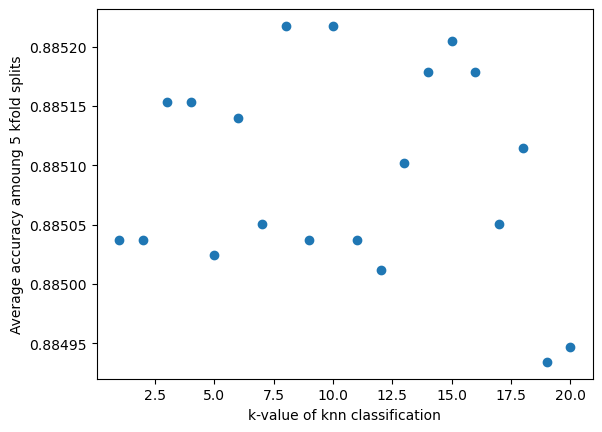

In [ ]:
k_values = [n for n in range(1,21)]
acc = [ave_accuracies[n][0] for n in range(1,21)]
plt.scatter(k_values, acc)
plt.xlabel('k-value of knn classification')
plt.ylabel('Average accuracy amoung 5 kfold splits')
plt.show()
#I left this in for now, but with so little change in accuracy among different hyperparameter choices, this should probably be taken out.

Now we use xgboost to classify the readmits. We still use 5 splits in kfold.

We measure performance by computing accuracy and confusion matrix. By these metrics, xgboost is very simmilar to knn.

In [ ]:
import xgboost as xgb

xgb_class = xgb.XGBClassifier()

n_splits = 5
current_split = 0
boost_metrics={n:[] for n in range(0,n_splits)}

for s_train, s_test in kfold.split(train):

    train_features = train.iloc[s_train][features]
    test_features = train.iloc[s_test][features]

    train_target = train.iloc[s_train]['readmitted']
    test_target = train.iloc[s_test]['readmitted']

    xgb_class.fit(train_features, train_target)
    boost_metrics[current_split].append(accuracy_score(xgb_class.predict(test_features), test_target))
    boost_metrics[current_split].append(confusion_matrix(xgb_class.predict(test_features), test_target))
    current_split += 1

for k in range(0,4):
    print('The accuracy of split ', k, ' is ', boost_metrics[k][0], ' confusion is ', boost_metrics[k][1])


The accuracy of split  0  is  0.8849272750675763  confusion is  [[13707  1712]
 [   76    43]]
The accuracy of split  1  is  0.8849198687005213  confusion is  [[13694  1729]
 [   59    55]]
The accuracy of split  2  is  0.8789341571731994  confusion is  [[13604  1805]
 [   76    52]]
The accuracy of split  3  is  0.8864645684495076  confusion is  [[13729  1696]
 [   68    44]]
